In [1]:
import sys
sys.path.append('../master_eq')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import master_eq
import utils

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport master_eq, utils

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

## An example for CNB I and CNB II

### Solve

**Arguments Setup**

- Number of Bosons: N = 1600
- Temperature: T/T_c = 0.94
- Rate Constant: kappa = 1.2e-7
- Cross Excitation Parameters for CNB II: eta = 0.368

**Run**

In [5]:
# CNB arguments
N = 1600 # number of trapped bosons
kappa = 1.2e-7 # rate constant
TTc = 0.94 # T/T_c, where T_c is the critical temperature

In [6]:
# CNB I
cnb1 = master_eq.CNBoson(N, TTc, kappa, eta=0)
cnb1.set_init_state(fock(N + 1, 0))

# CNB II
cnb2 = master_eq.CNBoson(N, TTc, kappa, eta=0.368)
cnb2.set_init_state(fock(N + 1, 0))

In [7]:
# set time
t_list = np.linspace(0, 500000, 501)

# solve master equations
cnb1.pn_evolve(t_list)
cnb2.pn_evolve(t_list)

2017-08-18 01:26:35.794905 START
2017-08-18 01:28:37.941756 FINISH
2017-08-18 01:28:37.942198 START
2017-08-18 01:30:12.611453 FINISH


In [8]:
np.savez('./data/cnb_N1600_T094.npz', cnb1=cnb1, cnb2=cnb2)
utils.save_cnb_to_csv(cnb1, cnb2, N, t_list, kappa)

### Results

In [9]:
# read data from files
n_df, entr_df, pn_df = utils.read_cnb_from_csv('./data/', 'cnb')
cnb_states = np.load('./data/cnb_N1600_T094.npz')
cnb1 = cnb_states['cnb1'].flatten()[0]
cnb2 = cnb_states['cnb2'].flatten()[0]

#### Avergae Boson Numbers vs. Time

In [10]:
print('Average Boson Number of Stable State')
print('CNB1: ', entr_df['CNB I'][500])
print('CNB2: ', entr_df['CNB II'][500])

Average Boson Number of Stable State
CNB1:  5.01515122109
CNB2:  5.17169876245


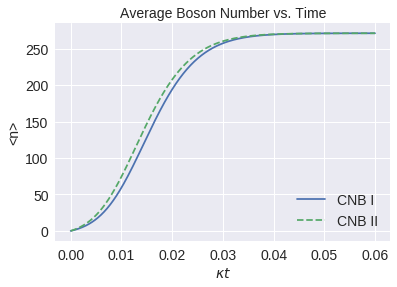

In [11]:
utils.df_plot(n_df, xaxis='$\kappa t$', 
              columns=['$\kappa t$', 'CNB I', 'CNB II'],
              xlim=(-0.003, 0.063), xlabel='$\kappa t$', ylabel="<n>", 
              style=['-', '--'], loc=4,
              title='Average Boson Number vs. Time')

#### Entropy vs. Time

In [12]:
print('Entropy of Stable State')
print('CNB1: ', entr_df['CNB I'][500])
print('CNB2: ', entr_df['CNB II'][500])

Entropy of Stable State
CNB1:  5.01515122109
CNB2:  5.17169876245


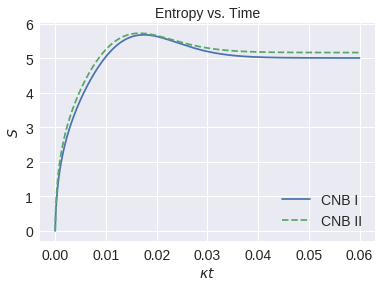

In [13]:
utils.df_plot(entr_df, xaxis='$\kappa t$', 
              columns=['$\kappa t$', 'CNB I', 'CNB II'],
              xlim=(-0.003, 0.063), xlabel='$\kappa t$', ylabel="$S$", 
              style=['-', '--'], loc=4, title='Entropy vs. Time')

#### Probability Distribution of Stable State

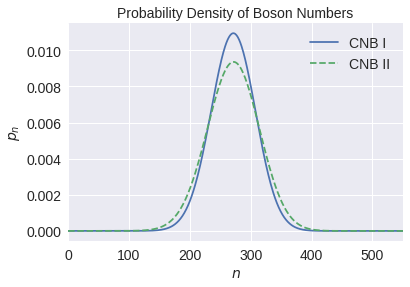

In [14]:
utils.df_plot(pn_df, xaxis='n', 
              columns=['n', 'CNB I', 'CNB II'],
              xlim=(0, 550), xlabel='$n$', ylabel="$p_n$", 
              style=['-', '--'], loc=1, 
              title='Probability Density of Boson Numbers')

#### Evolution of Probability Density

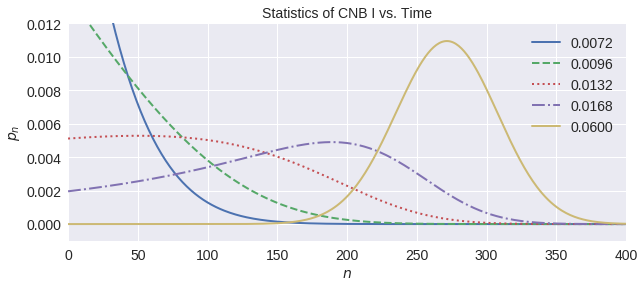

In [15]:
utils.plot_pn_vs_time(cnb1, [60, 80, 110, 140, 500], 
                      'Statistics of CNB I vs. Time', 
                      0, 400, -0.001, 0.012, cnb1.rate)

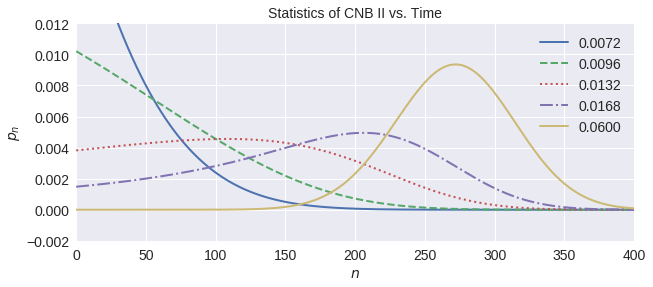

In [16]:
utils.plot_pn_vs_time(cnb2, [60, 80, 110, 140, 500], 
                      'Statistics of CNB II vs. Time', 
                      0, 400, -0.002, 0.012, cnb1.rate)

### Approximation of Entropy

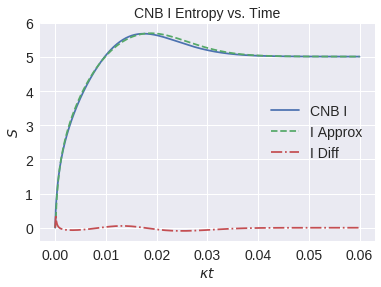

In [17]:
utils.df_plot(entr_df, xaxis='$\kappa t$', 
              columns=['$\kappa t$', 'CNB I', 'I Approx', 'I Diff'],
              xlim=(-0.003, 0.063), xlabel='$\kappa t$', ylabel="$S$", 
              style=['-', '--', '-.'], loc=0, title='CNB I Entropy vs. Time')

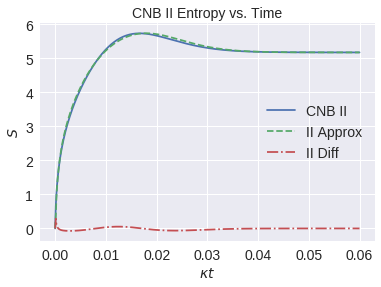

In [18]:
utils.df_plot(entr_df, xaxis='$\kappa t$', 
              columns=['$\kappa t$', 'CNB II', 'II Approx', 'II Diff'],
              xlim=(-0.003, 0.063), xlabel='$\kappa t$', ylabel="$S$", 
              style=['-', '--', '-.'], loc=0, title='CNB II Entropy vs. Time')